<a href="https://colab.research.google.com/github/hvr2026/Data-Science-Methodologies/blob/main/KDD/KDD_Business_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install imbalanced-learn matplotlib seaborn

In [17]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
# Step 2: Load and Explore Datasets

financial_data = pd.read_csv('/content/financial_data.csv')
revealed_businesses = pd.read_csv('/content/revealed_businesses.csv')
testing_data = pd.read_csv('/content/testing_data.csv')

In [18]:
# Step 3: Data Selection - Merge financial data with target labels
data = pd.merge(financial_data, revealed_businesses, on="Var1", how="inner")

In [5]:
# Step 4: Data Preprocessing
data.replace('?', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')


In [6]:
# Drop rows with any NaN values
data.dropna(inplace=True)

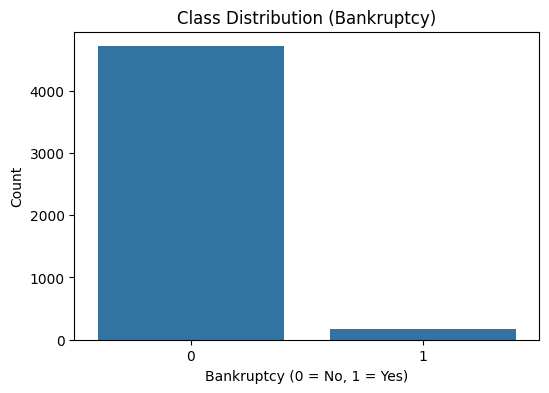

In [19]:
# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Var66', data=data)
plt.title('Class Distribution (Bankruptcy)')
plt.xlabel('Bankruptcy (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [7]:
# Separate features and target variable
X = data.drop(columns=['Var1', 'Var66'])
y = data['Var66']

In [8]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Step 6: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


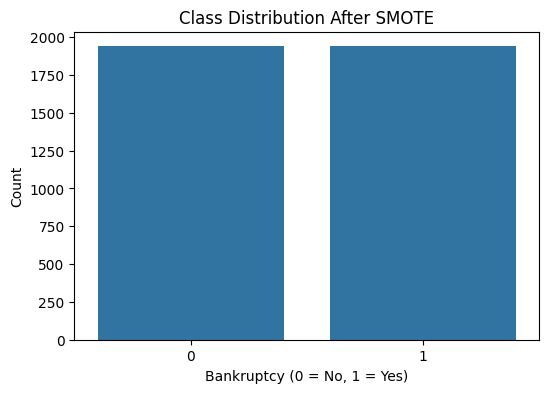

In [23]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Bankruptcy (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [10]:
# Step 7: Model Training with Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [11]:
# Step 8: Model Evaluation
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, zero_division=1)

print("Accuracy on validation set after SMOTE:", accuracy)
print("Classification Report on validation set after SMOTE:\n", report)

Accuracy on validation set after SMOTE: 0.9857142857142858
Classification Report on validation set after SMOTE:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       485
           1       0.25      0.20      0.22         5

    accuracy                           0.99       490
   macro avg       0.62      0.60      0.61       490
weighted avg       0.98      0.99      0.98       490



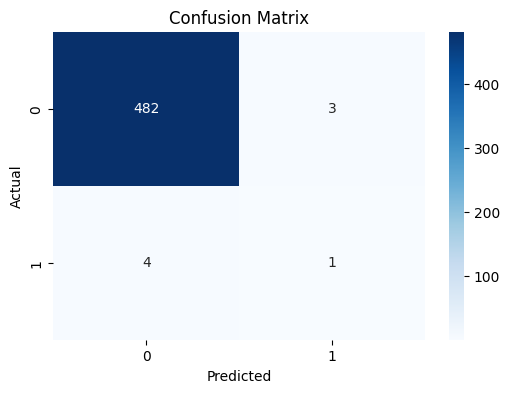

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Step 9: Prepare and Make Predictions on Test Data
# Replace non-numeric values in test data with NaN and convert all columns to numeric
testing_data.replace('?', np.nan, inplace=True)
testing_data = testing_data.apply(pd.to_numeric, errors='coerce')


In [26]:
# Fill or drop missing values as needed
testing_data.dropna(inplace=True)

# Separate the features from the identifier in test data
X_test = testing_data.drop(columns=['Var1'])


In [27]:
# Scale test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Make predictions on test data
test_predictions = model.predict(X_test_scaled)

In [28]:
# Convert predictions to DataFrame for easy export or analysis
test_results = pd.DataFrame({'Var1': testing_data['Var1'], 'Predicted_Bankruptcy': test_predictions})
print("Test Predictions:\n", test_results.head())

Test Predictions:
      Var1  Predicted_Bankruptcy
5   15946                     0
6   15526                     0
8   15049                     0
9   16206                     0
11  16045                     0
